In [2]:
import pandas as pd
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split  # chú ý
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  # hồi quy nhị phân
from sklearn.metrics import accuracy_score  # đánh giá độ chính xác

In [3]:
# KT1a


# đọc file csv

df = pd.read_csv('Iris.csv')

In [4]:
# encoder nhãn
df["Species_num"] = LabelEncoder().fit_transform(df["Species"])
print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  Species_num  
0       Iris-setosa            0  
1       Iris-setosa            0  
2       Iris-setosa            0  
3       Iris-setosa

In [5]:
# Trong tập dữ liệu có 3 loại hoa:
# iris_setosa ,  iris_virginica và Iris-versicolor
# Ta lấy 2 loại là iris_setosa và iris_virginica
newdf = df[df.Species_num.isin([0, 2])]
print(newdf)
print(newdf.shape)


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  Species_num  
0       Iris-setosa            0  
1       Iris-setosa            0  
2       Iris-setosa            0  
3       Iris-setosa

In [6]:
# Ta bỏ trường Species, chỉ lấy trường Species_num
newdf2 = newdf[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species_num']]
print(newdf2)


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species_num
0              5.1           3.5            1.4           0.2            0
1              4.9           3.0            1.4           0.2            0
2              4.7           3.2            1.3           0.2            0
3              4.6           3.1            1.5           0.2            0
4              5.0           3.6            1.4           0.2            0
..             ...           ...            ...           ...          ...
145            6.7           3.0            5.2           2.3            2
146            6.3           2.5            5.0           1.9            2
147            6.5           3.0            5.2           2.0            2
148            6.2           3.4            5.4           2.3            2
149            5.9           3.0            5.1           1.8            2

[100 rows x 5 columns]


In [7]:
# Tạo x và y trong đó:
# x là tập dữ liệu
# y là tập nhãn

x = newdf2[['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = newdf2['Species_num']


    SepalWidthCm  SepalLengthCm  PetalLengthCm  PetalWidthCm
0            3.5            5.1            1.4           0.2
1            3.0            4.9            1.4           0.2
2            3.2            4.7            1.3           0.2
3            3.1            4.6            1.5           0.2
4            3.6            5.0            1.4           0.2
5            3.9            5.4            1.7           0.4
6            3.4            4.6            1.4           0.3
7            3.4            5.0            1.5           0.2
8            2.9            4.4            1.4           0.2
9            3.1            4.9            1.5           0.1
10           3.7            5.4            1.5           0.2
11           3.4            4.8            1.6           0.2
12           3.0            4.8            1.4           0.1
13           3.0            4.3            1.1           0.1
14           4.0            5.8            1.2           0.2
15           4.4        

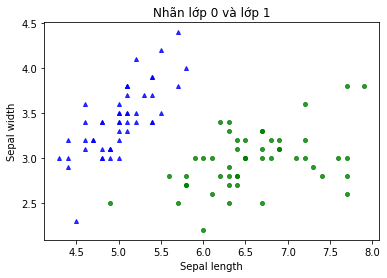

In [8]:
# Minh họa dữ liệu lên biểu đồ

x0 = x[y == 0]
x1 = x[y == 2]
print(x0)
plt.plot(x0['SepalLengthCm'], x0['SepalWidthCm'], 'b^', markersize=4, alpha=.8)
plt.plot(x1['SepalLengthCm'], x1['SepalWidthCm'], 'go', markersize=4, alpha=.8)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Nhãn lớp 0 và lớp 1')
plt.plot()
plt.show()

In [9]:
# Chuẩn bị dữ liệu cho phân lớp nhị phân
# x_train là dữ liệu train, y_train là nhãn của x_train
# x_test là dữ liệu test, y_test là nhãn của x_test
# test_size là phần chia dành cho dữ liệu test, với 0.2= 1/5 tức 1/5 data sẽ sử dụng cho test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
# Sử dụng LogisticRegression để phân lớp nhị phân
log_model = LogisticRegression(max_iter=1000).fit(x_train, y_train)
y_pred = log_model.predict(x_test)
# Dự đoán của model
print(y_pred)

[0 2 0 0 0 2 0 2 0 2 2 0 2 2 0 2 0 0 2 0]


In [11]:
# KT1b
# Đánh giá độ chính xác
print("Accuracy Score của LogisticRegression:", accuracy_score(y_test, y_pred))

Accuracy Score của LogisticRegression: 1.0


In [12]:
#KT1c Sử dụng thuật toán AdaBoost
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)
print("Accuracy Score của AdaBoostClassifier:", accuracy_score(y_test, y_pred))

[0 2 0 0 0 2 0 2 0 2 2 0 2 2 0 2 0 0 2 0]
Accuracy Score của AdaBoostClassifier: 1.0


In [13]:
# KT1d. Xây dựng 1 mô hình học máy phân lớp nhiều nhãn
# SVM tuyến tính để phân biệt tự động
# 3 loài hoa "iris_setosa", "iris_versicolor" và "iris_virginica"
# dựa trên 4 thuộc tính SepalLength, SepalWidth,PetalLength,PetalWidth.
svm_prepare_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species_num']]
print(svm_prepare_data)

svm_x = svm_prepare_data[['SepalWidthCm', 'SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]
svm_y = svm_prepare_data['Species_num']

svm_x_train, svm_x_test, svm_y_train, svm_y_test \
    = train_test_split(svm_x, svm_y, test_size=0.2)
print(svm_y_test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species_num
0              5.1           3.5            1.4           0.2            0
1              4.9           3.0            1.4           0.2            0
2              4.7           3.2            1.3           0.2            0
3              4.6           3.1            1.5           0.2            0
4              5.0           3.6            1.4           0.2            0
..             ...           ...            ...           ...          ...
145            6.7           3.0            5.2           2.3            2
146            6.3           2.5            5.0           1.9            2
147            6.5           3.0            5.2           2.0            2
148            6.2           3.4            5.4           2.3            2
149            5.9           3.0            5.1           1.8            2

[150 rows x 5 columns]
114    2
24     0
120    2
45     0
52     1
39     0
80     1
87     1
112 

In [14]:
svm_clf = svm.SVC(kernel='linear', C=1)
svm_clf.fit(svm_x_train, svm_y_train)

SVC(C=1, kernel='linear')

In [15]:
svm_y_pred = svm_clf.predict(svm_x_test)
print(svm_y_pred)
print(svm_y_test)
print("Accuracy Score của SVM:", accuracy_score(svm_y_test, svm_y_pred))


[2 0 2 0 1 0 1 1 2 2 1 1 0 0 1 0 1 1 1 2 0 1 2 0 2 0 2 2 2 2]
114    2
24     0
120    2
45     0
52     1
39     0
80     1
87     1
112    2
129    2
51     1
53     1
16     0
34     0
84     1
30     0
82     1
76     1
50     1
115    2
21     0
55     1
108    2
9      0
101    2
46     0
113    2
137    2
109    2
143    2
Name: Species_num, dtype: int32
Accuracy Score của SVM: 1.0
